# Clustering

[Clustering](https://en.wikipedia.org/wiki/Cluster_analysis) seeks to group data into clusters based on their properties and then allow us to predict which cluster a new member belongs.

We'll use a dataset generator that is part of [scikit-learn](https://scikit-learn.org/stable/index.html) called [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).  This generates data that falls into 2 different sets with a shape that looks like half-moons.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
def generate_data():
    xvec, val = datasets.make_moons(200, noise=0.2)

    # encode the output to be 2 elements
    x = []
    v = []
    for xv, vv in zip(xvec, val):
        x.append(np.array(xv))
        v.append(vv)

    return np.array(x), np.array(v)

In [3]:
def plot_data(x, v):
    xpt = [q[0] for q in x]
    ypt = [q[1] for q in x]

    fig, ax = plt.subplots()
    ax.scatter(xpt, ypt, s=40, c=v, cmap="viridis")
    ax.set_aspect("equal")
    return fig

In [4]:
x, v = generate_data()

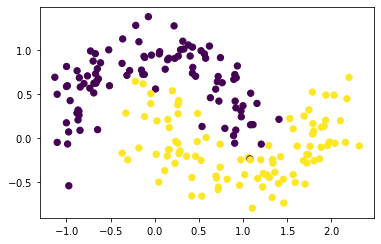

In [5]:
fig = plot_data(x, v)

We want to partition this domain into 2 regions, such that when we come in with a new point, we know which group it belongs to.

First we setup and train our network

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop

2023-04-10 11:33:18.889643: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-10 11:33:18.891230: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 11:33:18.921421: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 11:33:18.922155: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 11:33:19.485955: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [8]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [9]:
rms = RMSprop()
model.compile(loss='binary_crossentropy',
              optimizer=rms, metrics=['accuracy'])

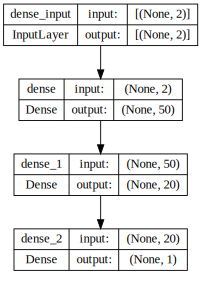

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

We seem to need a lot of epochs here

In [18]:
epochs = 50
results = model.fit(x, v, batch_size=20, epochs=epochs)

Epoch 1/50
10/10 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.8650
Epoch 2/50
10/10 [==============================] - 0s 975us/step - loss: 0.2795 - accuracy: 0.8700
Epoch 3/50
10/10 [==============================] - 0s 1ms/step - loss: 0.2788 - accuracy: 0.8700
Epoch 4/50
10/10 [==============================] - 0s 1ms/step - loss: 0.2789 - accuracy: 0.8600
Epoch 5/50
10/10 [==============================] - 0s 865us/step - loss: 0.2771 - accuracy: 0.8600
Epoch 6/50
10/10 [==============================] - 0s 1ms/step - loss: 0.2739 - accuracy: 0.8700
Epoch 7/50
10/10 [==============================] - 0s 864us/step - loss: 0.2725 - accuracy: 0.8700
Epoch 8/50
10/10 [==============================] - 0s 823us/step - loss: 0.2720 - accuracy: 0.8650
Epoch 9/50
10/10 [==============================] - 0s 825us/step - loss: 0.2696 - accuracy: 0.8750
Epoch 10/50
10/10 [==============================] - 0s 861us/step - loss: 0.2696 - accuracy: 0.8700
Epoch 1

In [19]:
score = model.evaluate(x, v, verbose=0)
print(f"score = {score[0]}")
print(f"accuracy = {score[1]}")

score = 0.18238018453121185
accuracy = 0.8999999761581421


Let's plot the partitioning

In [22]:
M = 48
N = 48
domain = np.zeros((M, N), dtype="int")

xmin = -1.75
xmax = 2.5
ymin = -1.25
ymax = 1.75

xpt = np.linspace(-2.0, 2.0, M)
ypt = np.linspace(-2.0, 2.0, N)

In [23]:
for m in range(M):
    print(m)
    for n in range(N):
        res = model.predict(np.array([xpt[m], ypt[n]]).reshape(1, 2),
                            verbose=0)
        domain[m, n] = (res > 0.5).astype("int32")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


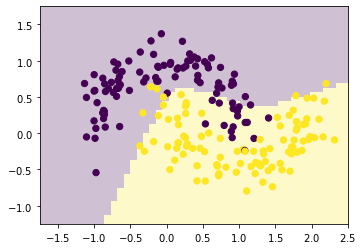

In [26]:
fig, ax = plt.subplots()
ax.imshow(domain.T, origin="lower",
          extent=[xmin, xmax, ymin, ymax], alpha=0.25)
xpt = [q[0] for q in x]
ypt = [q[1] for q in x]

ax.scatter(xpt, ypt, s=40, c=v, cmap="viridis")